## Import necessary Packages

In [1]:
import numpy as np
import sympy as sy
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

## Our Idea:

### Ax = y; 
### where A = Set of Coefficients of Polynomial ; x = polynomial ; y = Ax

## Actual co-ordinates

In [2]:
x =  np.array([200,350,200,350,275,238,230,250,325,240,270,260,255,228,265,273.8,257.65,270,280])
y =  np.array([75,25,25,75,50,60,65,55,55,60,52,55,55,37,55,56.2,52.15,55,55])
f = np.array([91.171,198.4252,407.3497,302.3131,39.9434,38.4335,45.596,36.368,83.132,36.8001,36.2909,34.2857,35,168.304,33.9,35.04,38.2717,33.62,36.61])

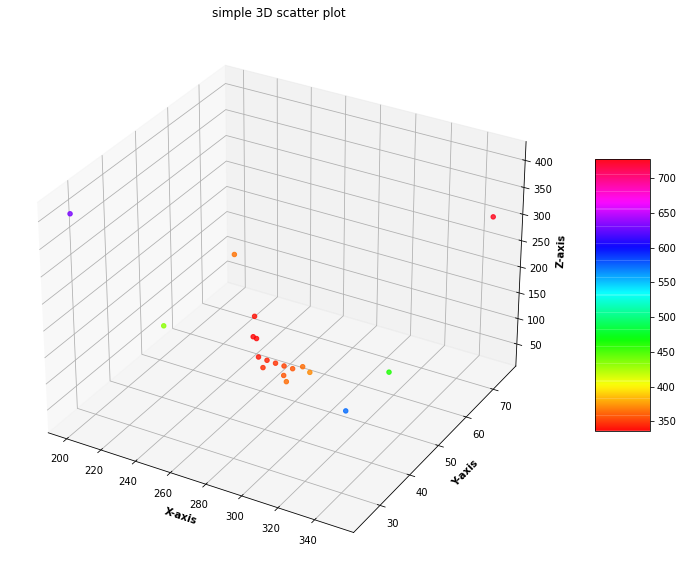

In [3]:
fig = plt.figure(figsize = (16,10))
ax = plt.axes(projection ='3d')

# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, f,alpha = 0.8,c = (x + y + f),cmap = my_cmap,marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

### Function to calculate Best fit polynomial

In [4]:
def polyfit(x,y,f,thres = 0.01):
    fin_pred = 0
    flagger = True
    power = 1
    while(flagger):
        print(f"Executing {power} iteration")
        old_fin_pred = fin_pred
        print("Old Fin Pred ",old_fin_pred)
        x_whats = []
        for i in range(power,1,-1):
            x_whats.append(x**i)
            x_whats.append(y**i)
            x_whats.append(np.sin(x**i))
            x_whats.append(np.cos(x**i))
            x_whats.append(np.sin(y**i))
            x_whats.append(np.cos(y**i))
        x_whats.append(np.log(x))
        x_whats.append(np.log(y))
        x_whats.append(np.log(x+y))
        x_whats.append(np.ones(len(x)))
        
        x_whats = np.array(x_whats).T
        A_whats = np.matmul(np.linalg.pinv(x_whats),f)
        fin_pred = np.abs(np.dot(x_whats,A_whats))
        print("New Predictions = ",fin_pred)
        print(f"Power {power} executed and error is {np.linalg.norm(f - fin_pred)}")
        if(np.linalg.norm(np.round(fin_pred,3)-np.round(old_fin_pred,3)) == 0 or np.linalg.norm(fin_pred - f) < thres):
            flagger = False
        else:
            power += 1
            
    return power , A_whats , fin_pred

In [5]:
power , A_whats ,fin_pred = polyfit(x,y,f)

Executing 1 iteration
Old Fin Pred  0
New Predictions =  [ 48.33768251 262.06551697 223.03900056  20.82548608  91.3378364
  62.72609918  53.31633424  74.89086952  75.88884005  62.47281291
  84.09603687  74.50618686  74.67191372 145.52579666  74.3901476
  70.6006949   83.53390565  74.32052229  74.30861704]
Power 1 executed and error is 372.29464855896646
Executing 2 iteration
Old Fin Pred  [ 48.33768251 262.06551697 223.03900056  20.82548608  91.3378364
  62.72609918  53.31633424  74.89086952  75.88884005  62.47281291
  84.09603687  74.50618686  74.67191372 145.52579666  74.3901476
  70.6006949   83.53390565  74.32052229  74.30861704]
New Predictions =  [ 88.2846049  198.31856377 411.16507043 299.68380271  38.45456951
  43.02434075  47.79205302  32.28845024  87.55842322  44.14666221
  36.21317783  32.62930684  31.05203573 160.62825401  35.2338551
  34.36589813  37.24076634  34.01522924  38.759236  ]
Power 2 executed and error is 15.279427949266234
Executing 3 iteration
Old Fin Pred  [ 8

In [6]:
print("Power = ",power)
print("Coefficients = ",A_whats)
print("Final Predictions = ",fin_pred)

Power =  4
Coefficients =  [ 2.46333590e-05 -3.02453518e-03  8.87327035e+02  1.53470581e+02
 -9.55748852e+00 -1.17121088e+03 -1.57130861e-02  3.36406989e-01
  8.83321185e+00 -1.12423720e+03 -4.43243706e+02 -1.49217470e+03
  2.69337909e+00 -8.78640507e+00 -1.47861778e+02  4.07210009e+02
  2.71780505e+02 -3.84645455e+01  1.47041484e+03  7.21460805e+02
 -5.56323954e+03  3.28870914e+02]
Final Predictions =  [ 91.171      198.42519888 407.34969994 302.31310087  39.94340001
  38.43350025  45.5960005   36.36799995  83.13199968  36.80010038
  36.29089968  34.2856996   34.99999971 168.30400011  33.90000039
  35.0400003   38.27170013  33.62000042  36.61000034]


## Function Formulation

In [7]:
var_x = sy.symbols('x')
var_y = sy.symbols('y')

In [8]:
def get_curve(power,coeffs):
    #coeffs = np.round(coeffs,3)
    act_exp = []
    for i in range(power,1,-1):
        act_exp.append(var_x**i)
        act_exp.append(var_y**i)
        act_exp.append(sy.sin(var_x**i))
        act_exp.append(sy.cos(var_x**i))
        act_exp.append(sy.sin(var_y**i))
        act_exp.append(sy.cos(var_y**i))
    act_exp.append(sy.log(var_x))
    act_exp.append(sy.log(var_y))
    act_exp.append(sy.log(var_x+var_y))
    act_exp.append(1)
    
    function_xy = sy.Abs(np.dot(coeffs, act_exp))
    return function_xy

In [9]:
polynomial = get_curve(power, A_whats)

In [10]:
# print("Polynomial = ")
# polynomial

In [11]:
for i in range(len(f)):
    print(f"Substituting x as {x[i]} and y as {y[i]}, we get : {polynomial.evalf(subs={var_x: x[i],var_y : y[i]})}")

Substituting x as 200.0 and y as 75.0, we get : 91.1710000000385
Substituting x as 350.0 and y as 25.0, we get : 198.425198879130
Substituting x as 200.0 and y as 25.0, we get : 407.349699935891
Substituting x as 350.0 and y as 75.0, we get : 302.313100869525
Substituting x as 275.0 and y as 50.0, we get : 39.9434000108979
Substituting x as 238.0 and y as 60.0, we get : 38.4335002532513
Substituting x as 230.0 and y as 65.0, we get : 45.5960004971765
Substituting x as 250.0 and y as 55.0, we get : 36.3679999534953
Substituting x as 325.0 and y as 55.0, we get : 83.1319996778301
Substituting x as 240.0 and y as 60.0, we get : 36.8001003827457
Substituting x as 270.0 and y as 52.0, we get : 36.2908996766444
Substituting x as 260.0 and y as 55.0, we get : 34.2856995963244
Substituting x as 255.0 and y as 55.0, we get : 34.9999997097319
Substituting x as 228.0 and y as 37.0, we get : 168.304000110166
Substituting x as 265.0 and y as 55.0, we get : 33.9000003932888
Substituting x as 273.8 a

In [12]:
new_x = 273.8
new_y = 56.2
expected_val = 35.04
print(f"But, by substituting x as {new_x} and y as {new_y}, we get : {polynomial.evalf(subs={var_x: new_x,var_y : new_y})}")

But, by substituting x as 273.8 and y as 56.2, we get : 35.0401211220283


In [13]:
def get_glob_min(poly,x_min,x_max,y_min,y_max,interval = 0.05):
    min_val = np.Inf
    min_at_x = x_min
    min_at_y = y_min
    
    cur_x = x_min
    cur_y = y_min
  
    for i in range(x_min,int(x_max/interval)):
        cur_y = y_min
        for j in range(y_min,int(y_max/interval)):
            cur_val = np.abs(poly.evalf(subs={var_x: cur_x,var_y : cur_y}))
            if(cur_val < min_val):
                print(f"Value minimum at: x = {cur_x} and y = {cur_y}")
                min_at_x = cur_x
                min_at_y = cur_y
                print(f"Value is : {cur_val}")
                min_val = cur_val
            cur_y += interval
        cur_x += interval
    print(f"\nGlobal Minima is at x = {min_at_x} and y = {min_at_y}")